## Import Library and Initialize Global Variables

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,\
                            precision_score, recall_score, roc_curve,\
                            roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

SEED = 41

In [5]:
SEED = 128

## Load Database/Import Data 

In [6]:
df = pd.read_csv("diabetes_data_upload.csv")

In [7]:
#Change the values of Result from 'Positive' to 'Diabetic' and from 'Negative' to 'Not Diabetic'
#To increase clarity of dataset's purpose

df['Result'] = df['Result'].apply(lambda x: 'Diabetic' if x=='Positive' else 'Not Diabetic')

In [8]:
df.head()

,Age,Gender,Excess Urination,Excess Drinking,Sudden Weight Loss,Weakness,Excess Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paralysis,Muscle Stiffness,Hair Loss,Obesity,Result
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Diabetic
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Diabetic
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Diabetic
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Diabetic
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Diabetic


In [9]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

## Initial Data Analysis

In [10]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Excess Urination    520 non-null    object
 3   Excess Drinking     520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Excess Hunger       520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paralysis   520 non-null    object
 13  Muscle Stiffness    520 non-null    object
 14  Hair Loss           520 non-null    object
 15  Obesity             520 non-null    object
 16  Result              520 no

In [12]:
df.shape

(520, 17)

In [13]:
df.isna().any()

Age                   False
Gender                False
Excess Urination      False
Excess Drinking       False
Sudden Weight Loss    False
Weakness              False
Excess Hunger         False
Genital Thrush        False
Visual Blurring       False
Itching               False
Irritability          False
Delayed Healing       False
Partial Paralysis     False
Muscle Stiffness      False
Hair Loss             False
Obesity               False
Result                False
dtype: bool

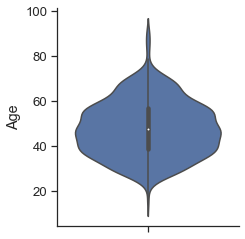

In [14]:
features = ['Age']

plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.violinplot(data=df, y=feature)  
    
sns.despine()

In [15]:
df.nunique()

Age                   51
Gender                 2
Excess Urination       2
Excess Drinking        2
Sudden Weight Loss     2
Weakness               2
Excess Hunger          2
Genital Thrush         2
Visual Blurring        2
Itching                2
Irritability           2
Delayed Healing        2
Partial Paralysis      2
Muscle Stiffness       2
Hair Loss              2
Obesity                2
Result                 2
dtype: int64

In [16]:
np.sort(df['Age'].unique())

array([16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 79, 85, 90],
      dtype=int64)

In [17]:
df['Age'].value_counts().sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)

16     1
25     2
26     1
27     6
28     9
29     1
30    25
31     3
32     5
33     4
34     6
35    30
36     8
37     7
38    20
39    16
40    24
41     4
42     9
43    25
44     7
45    18
46     8
47    21
48    28
49     7
50    18
51     5
52     4
53    20
54    16
55    22
56     8
57    15
58    18
59     4
60    15
61     8
62     7
63     3
64     5
65     6
66     9
67     8
68    10
69     5
70     5
72     9
79     1
85     2
90     2
Name: Age, dtype: int64

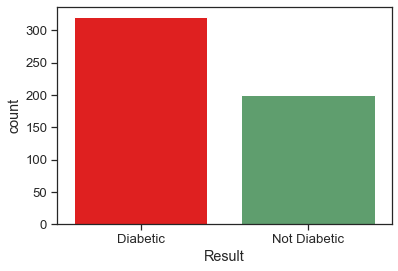

In [18]:
_ = sns.countplot(x="Result", data=df, palette=['red', 'g'])

## Exploratory Data Analysis (EDA)

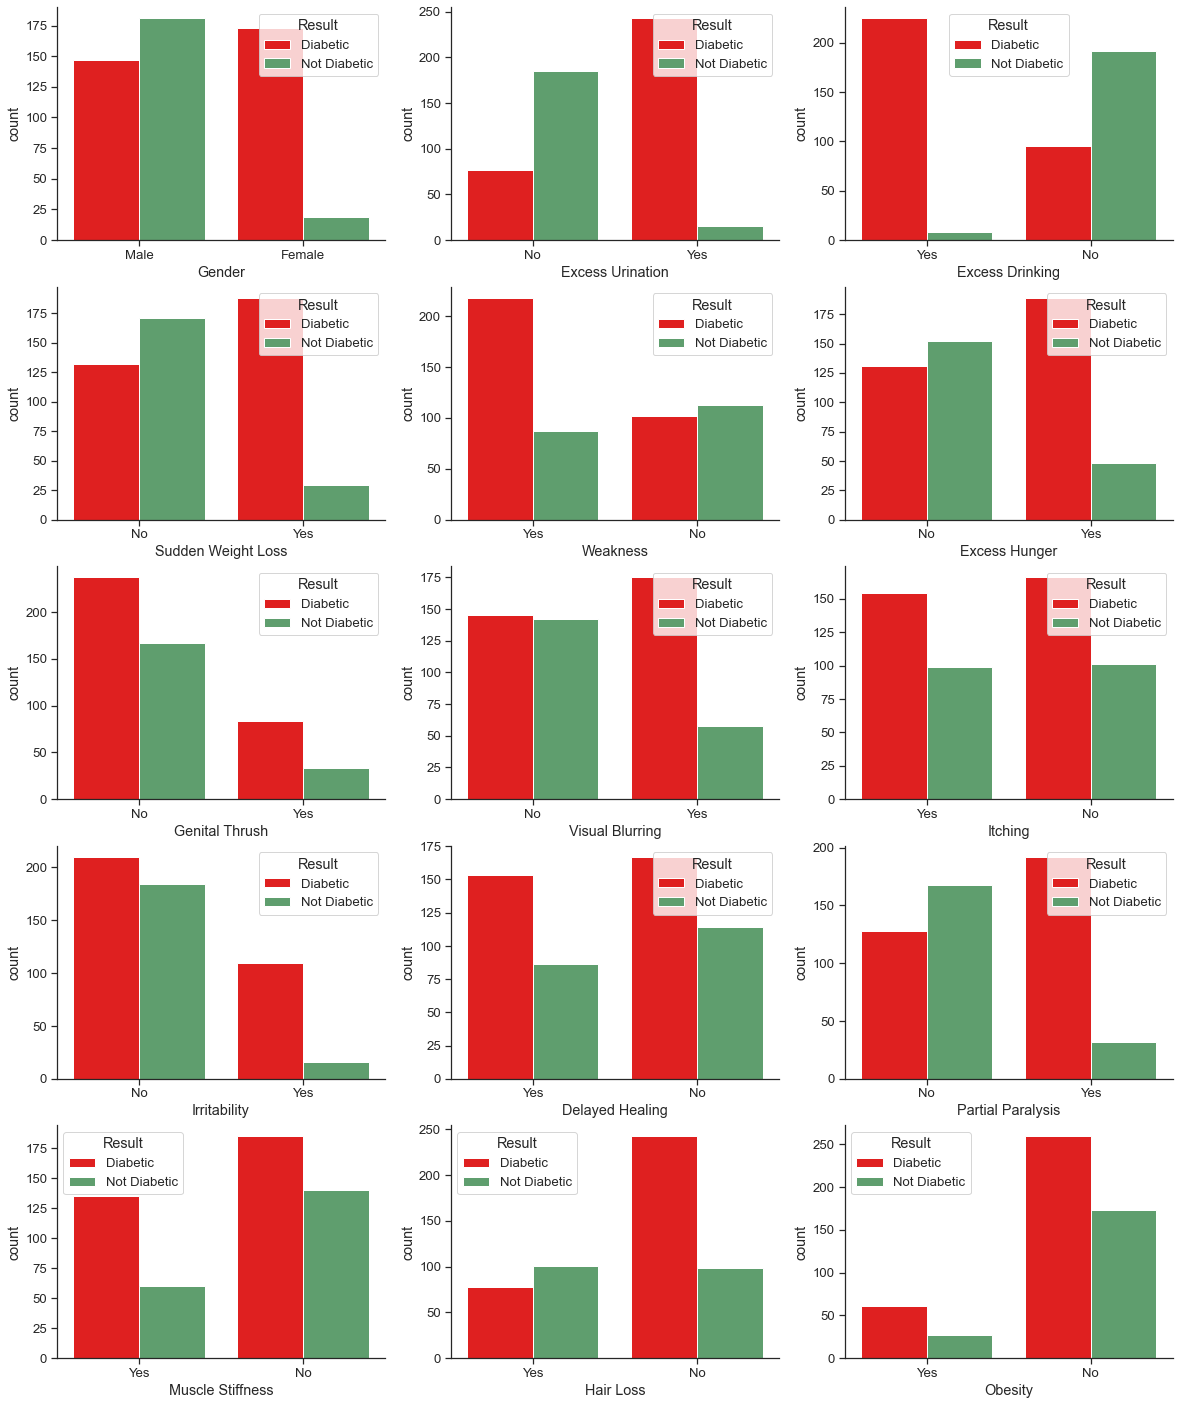

In [19]:
cat_features = ['Gender', 'Excess Urination', 'Excess Drinking', 'Sudden Weight Loss', 'Weakness', 'Excess Hunger', 'Genital Thrush',
'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paralysis', 'Muscle Stiffness', 'Hair Loss', 'Obesity']


plt.figure(figsize=(20, 30))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(cat_features):
    plt.subplot(6, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Result', palette=['red', 'g'])  
    
sns.despine()

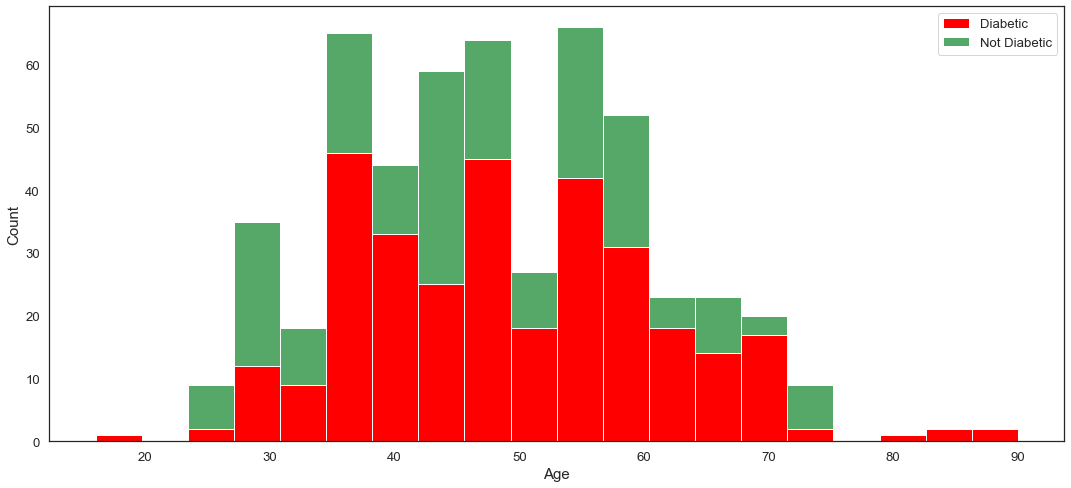

In [20]:
num_features = ['Age']
sns.set_style('white')

plt.figure(figsize=(40, 8))
for i, feature in enumerate(num_features):
    plt.subplot(1, 2, i+1)
    plt.hist(x=[df[feature][df['Result'] == 'Diabetic'], 
                df[feature][df['Result'] == 'Not Diabetic']],
             stacked=True, 
             label=['Diabetic', 'Not Diabetic'], 
             bins=20, 
             color=['red', 'g'])
    plt.legend()
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('Count', fontsize=15)

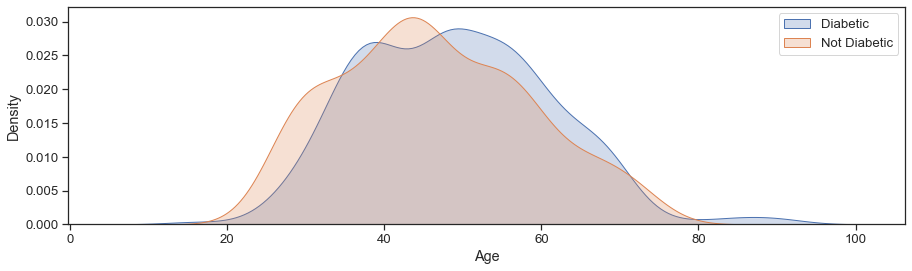

In [21]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(df['Age'][df['Result'] == 'Diabetic'], label='Diabetic', shade=True)
_ = sns.kdeplot(df['Age'][df['Result'] == 'Not Diabetic'], label='Not Diabetic', shade=True)
_ = plt.legend()

### Additional Data Preprocessing/Feature Engineering post EDA

In [22]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    if x!='Result': 
        df[x]= le.fit_transform(df[x])

Gender ['Male' 'Female']
Excess Urination ['No' 'Yes']
Excess Drinking ['Yes' 'No']
Sudden Weight Loss ['No' 'Yes']
Weakness ['Yes' 'No']
Excess Hunger ['No' 'Yes']
Genital Thrush ['No' 'Yes']
Visual Blurring ['No' 'Yes']
Itching ['Yes' 'No']
Irritability ['No' 'Yes']
Delayed Healing ['Yes' 'No']
Partial Paralysis ['No' 'Yes']
Muscle Stiffness ['Yes' 'No']
Hair Loss ['Yes' 'No']
Obesity ['Yes' 'No']
Result ['Diabetic' 'Not Diabetic']


In [23]:
df.head()

,Age,Gender,Excess Urination,Excess Drinking,Sudden Weight Loss,Weakness,Excess Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paralysis,Muscle Stiffness,Hair Loss,Obesity,Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Diabetic
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Diabetic
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Diabetic
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Diabetic
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Diabetic


In [24]:
df['Result'] = df['Result'].apply(lambda x: 1 if x=='Diabetic' else 0)

In [25]:
df.head()

,Age,Gender,Excess Urination,Excess Drinking,Sudden Weight Loss,Weakness,Excess Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paralysis,Muscle Stiffness,Hair Loss,Obesity,Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


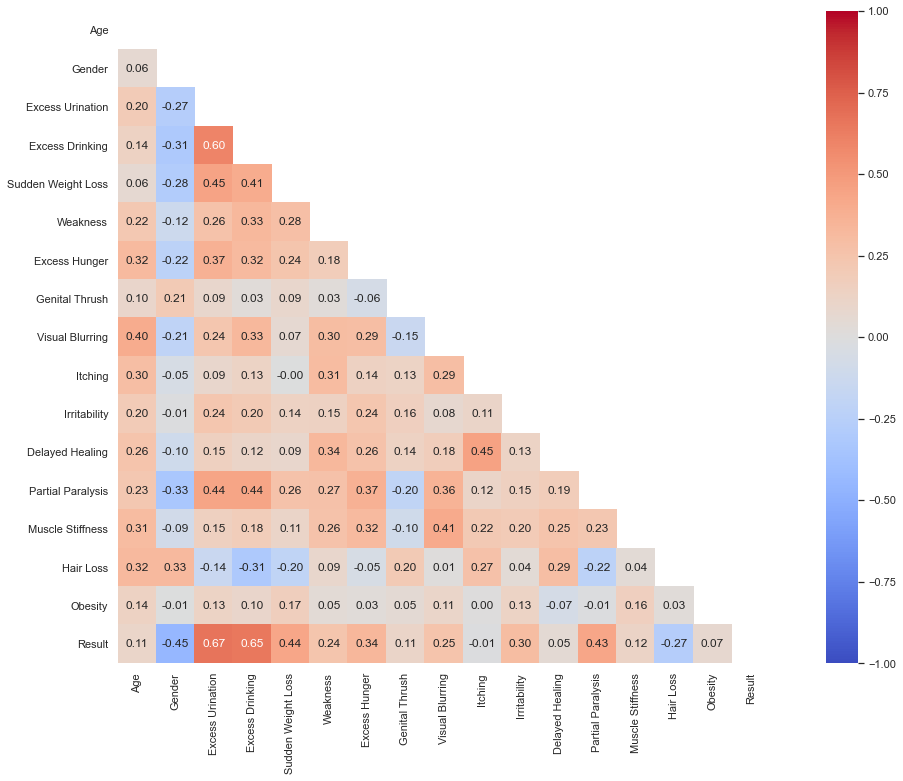

In [26]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,12))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

## Model Selection

### Split Data (Features/Target, Train/Validation/Testing)

In [27]:
X = df.drop(['Result'], axis=1)
y = df['Result']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

### Feature Scaling (Normalization/Standardization)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train a Model (Logistic Regression, baseline for Classification Model)

In [30]:
%%time
lr_baseline = LogisticRegression(random_state=SEED)
scores = cross_val_score(lr_baseline,
                         X_train_scaled,
                         y_train,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)

Wall time: 5.09 s


In [31]:
print("Baseline Model's score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))

Baseline Model's score: 0.93 (avg) 0.04 (std)


### Evaluate Multiple Models and Select Best Model(s)

In [32]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=SEED))) #more used
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(random_state=SEED))) #more used
models.append(('DT', DecisionTreeClassifier(random_state=SEED)))
models.append(('RF', RandomForestClassifier(random_state=SEED))) #more used
models.append(('MLP', MLPClassifier(random_state=SEED)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

LR : Mean score 0.9328 (Std 0.0366)
KNN: Mean score 0.9091 (Std 0.0445)
GNB: Mean score 0.8850 (Std 0.0557)
SVM: Mean score 0.9642 (Std 0.0357)
DT : Mean score 0.9570 (Std 0.0395)
RF : Mean score 0.9784 (Std 0.0271)
MLP: Mean score 0.9593 (Std 0.0354)


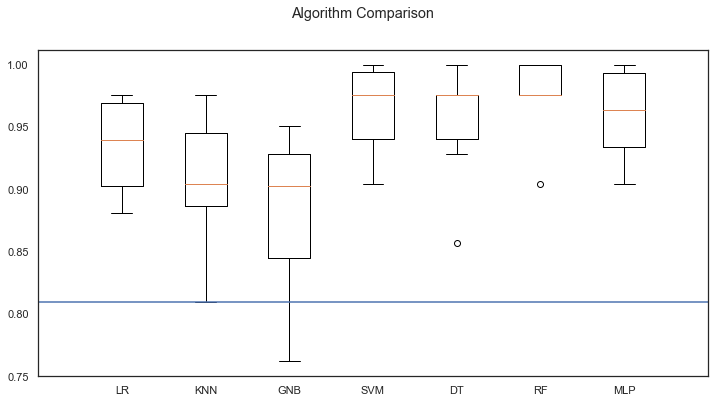

Wall time: 10.9 s


In [33]:
%%time
for name, model in models:
#     kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, 
                                 X_train_scaled, 
                                 y_train, 
                                 cv=10, 
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{:3}: Mean score {:.4f} (Std {:.4f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot([-2,10], [0.81, 0.81])
plt.xlim(0, 8)
plt.show()

### Hyperparameter Fine-tuning (for 2-4 selected models)

In [34]:
%%time
# Hyperparameter fine-tuning for Logistic Regression on multi-class dataset
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'C': np.logspace(-5, 2, 10)}

gs_clf = GridSearchCV(LogisticRegression(max_iter=1000, n_jobs=-1, random_state=SEED),
                      parameters, 
                      cv=10,
                      scoring='accuracy',
#                       scoring='f1_macro',
#                       scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train_scaled, y_train)

lr_final = gs_clf.best_estimator_

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

LogisticRegression(C=0.4641588833612782, max_iter=1000, n_jobs=-1,
                   random_state=128)
{'C': 0.4641588833612782, 'penalty': 'l2'}
0.9304878048780487
Wall time: 1.07 s


In [35]:
%%time
# Hyperparameter fine-tuning for Support Vector Machine on multi-class dataset
parameters = {'C': np.logspace(-5, 2, 10),
              'gamma' : ['scale', 'auto']
              }

gs_clf = GridSearchCV(SVC(random_state=SEED),
                      parameters, 
                      cv=10,
                      scoring='accuracy',
#                       scoring='f1_macro',
#                       scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train_scaled, y_train)

svm_final = gs_clf.best_estimator_

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

SVC(C=2.782559402207126, random_state=128)
{'C': 2.782559402207126, 'gamma': 'scale'}
0.9760162601626016
Wall time: 380 ms


In [36]:
%%time
# Hyperparameter fine-tuning for Random Forest on multi-class dataset
parameters = {'n_estimators': [200, 500, 800],
              'max_depth': [5, 10, None],
              'min_samples_split': [3, 5, 10, 15]}
#               'min_samples_leaf': [2, 3, 4],
#               'max_features': ['sqrt', 'log2']}

gs_clf = GridSearchCV(RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=SEED),
                      parameters, 
                      cv=10,
                      scoring='accuracy',
#                       scoring='f1_macro',
#                       scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train_scaled, y_train)

rf_final = gs_clf.best_estimator_

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=128)
{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
0.9783972125435539
Wall time: 2min 31s


In [37]:
%%time
# Hyperparameter fine-tuning for Multi-layer Perceptron on multi-class dataset
parameters = {'hidden_layer_sizes': [(3,), (5,), (3,3), (5,5), (3, 3, 3)]}

gs_clf = GridSearchCV(MLPClassifier(max_iter=1000, random_state=SEED),
                      parameters, 
                      cv=10,
                      scoring='accuracy',
#                       scoring='f1_macro',
#                       scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train_scaled, y_train)

mlp_final = gs_clf.best_estimator_

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=128)
{'hidden_layer_sizes': (5,)}
0.9544134727061557
Wall time: 21.9 s


### Evaluate the fine-tuned Model(s) (whether it will generalize well with the unseen data - testing dataset)
####  - Select the final model

In [38]:
models = []

In [39]:
y_pred = lr_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Logistic Regression',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.91      0.94      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.89      0.90       104
weighted avg       0.90      0.90      0.90       104



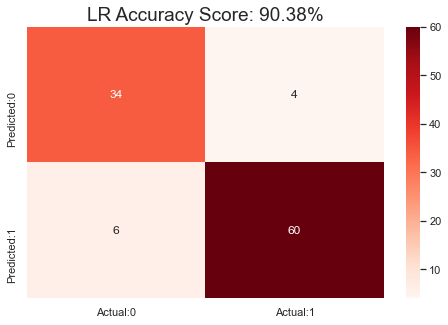

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap = 'Reds')

# print the scores on training and test set
cm_title = 'LR Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

In [41]:
y_pred = svm_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Support Vector Machine',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.97      0.98      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



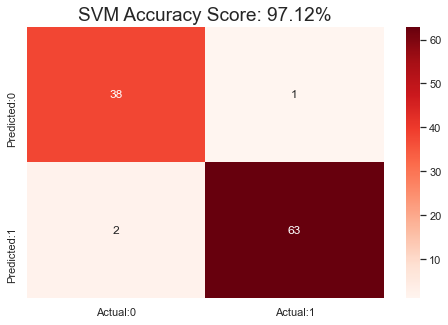

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap = 'Reds')

# print the scores on training and test set
cm_title = 'SVM Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

In [43]:
y_pred = rf_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Random Forest',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



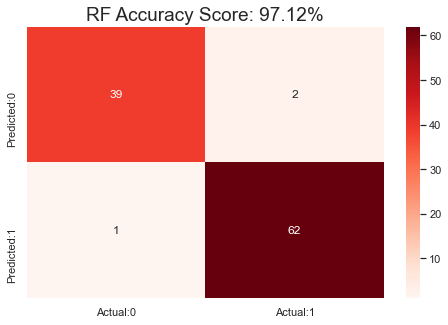

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap = 'Reds')

# print the scores on training and test set
all_sample_title = 'RF Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(all_sample_title, size = 19)

In [45]:
y_pred = mlp_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

models.append({'Name': 'Multilayer Perceptron',
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 Score': f1score})

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.93      0.97      0.95        64

    accuracy                           0.93       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.93      0.93      0.93       104



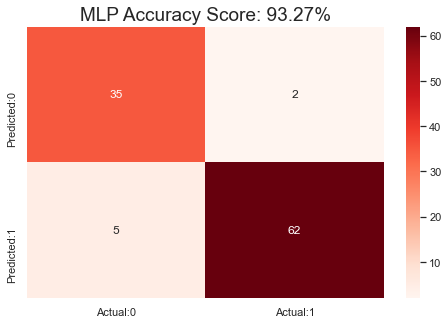

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap = 'Reds')

# print the scores on training and test set
all_sample_title = 'MLP Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(all_sample_title, size = 19)

In [47]:
model_metrics = pd.DataFrame(models)
model_metrics.sort_values('Accuracy', ascending=False)

,Name,Accuracy,Precision,Recall,F1 Score
1,Support Vector Machine,0.971154,0.969231,0.984375,0.976744
2,Random Forest,0.971154,0.984127,0.968750,0.976378
3,Multilayer Perceptron,0.932692,0.925373,0.968750,0.946565
0,Logistic Regression,0.903846,0.909091,0.937500,0.923077


## Post-mortem Analysis

In [48]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_final.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

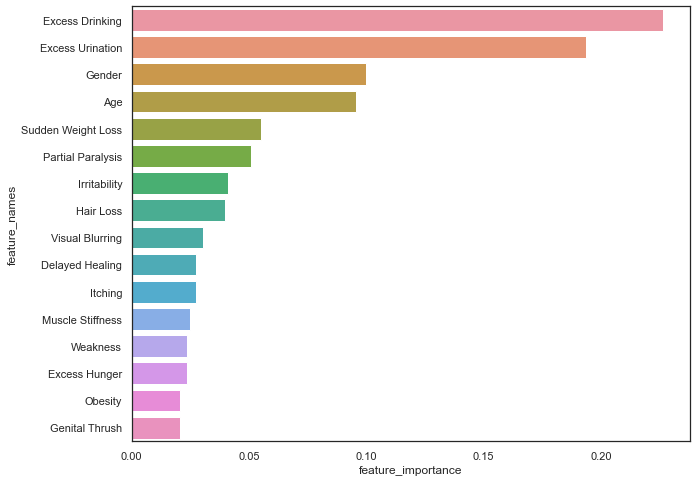

In [49]:
plt.figure(figsize=(10,8))
_ = sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

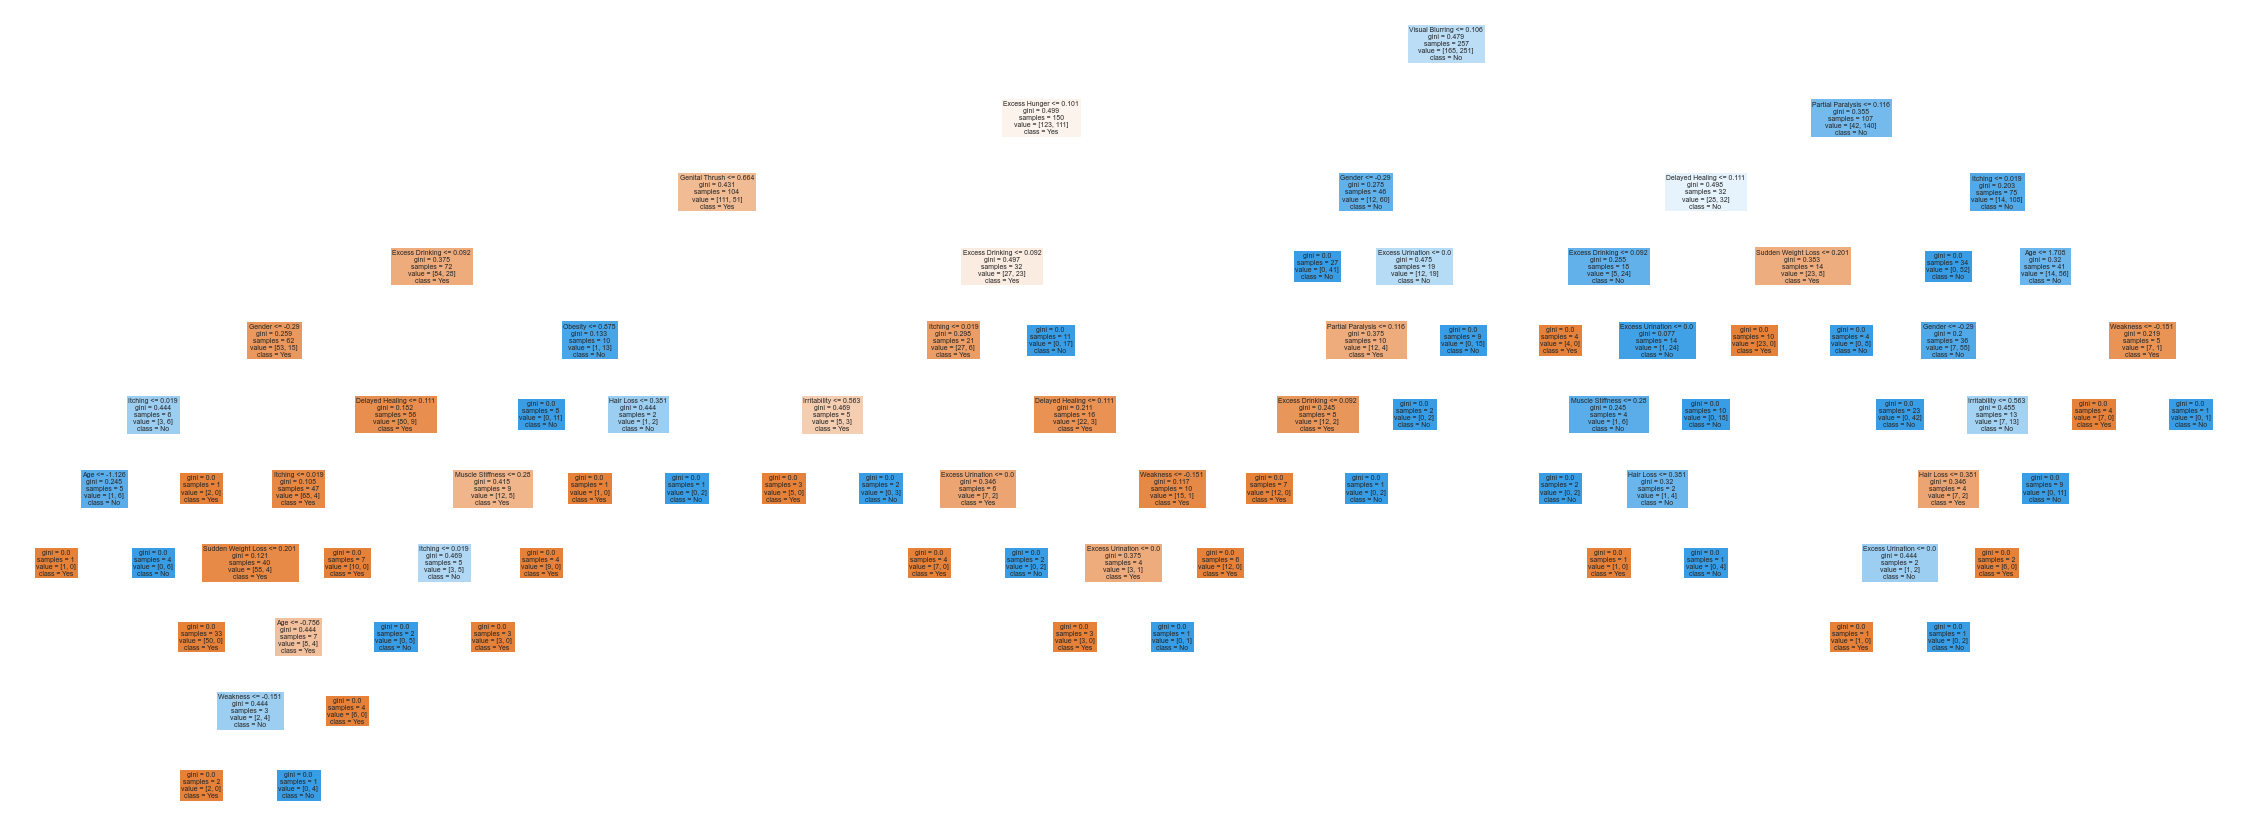

In [50]:
from sklearn import tree

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf_classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);


## Benchmark

In [51]:
#Probabilities (not diabetic, diabetic) of all test data (520*0.2 = 104 rows)
rf_final.predict_proba(X_test_scaled)

array([[0.07      , 0.93      ],
       [0.08375   , 0.91625   ],
       [0.69933333, 0.30066667],
       [0.99666667, 0.00333333],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.0025    , 0.9975    ],
       [0.        , 1.        ],
       [0.03875   , 0.96125   ],
       [0.57825   , 0.42175   ],
       [0.        , 1.        ],
       [0.93009091, 0.06990909],
       [0.03375   , 0.96625   ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.83776005, 0.16223995],
       [0.9925    , 0.0075    ],
       [0.08625   , 0.91375   ],
       [0.24935721, 0.75064279],
       [0.98317932, 0.01682068],
       [0.99518126, 0.00481874],
       [0.80532718, 0.19467282],
       [0.76583333, 0.23416667],
       [0.51582143, 0.48417857],
       [0.01083333, 0.98916667],
       [0.025     , 0.975     ],
       [0.15875   , 0.84125   ],
       [0.02      , 0.98      ],
       [0.        , 1.        ],
       [0.19285157, 0.80714843],
       [0.

In [52]:
#Find mean of test data's average probability of being diabetic
Avg_Diabetic_Rate =  float(rf_final.predict_proba(X_test_scaled)[:,1].reshape(-1,1).mean())
Avg_Diabetic_Rate_Pct = "{0:.0%}".format(rf_final.predict_proba(X_test_scaled)[:,1].reshape(-1,1).mean())

Avg_Diabetic_Rate_Pct

'61%'

## Prediction based on client's inputs

In [53]:
#Function to scale custom input data 
def standardize(*args):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    scaled = scaler.transform(inputs.reshape(-1,16))
    return scaled

inputs= np.array([
                        55, #Age
                         1, #Gender - Male->1, Female->0
                         0, #Excess Urination - Yes->1, No->0
                         0, #Excess Drinking - Yes->1, No->0
                         0, #Sudden Weight Loss - Yes->1, No->0
                         1, #Weakness - Yes->1, No->0
                         1, #Excess Hunger - Yes->1, No->0
                         0, #Genital Thrush - Yes->1, No->0
                         1, #Visual Blurring - Yes->1, No->0
                         1, #Itching - Yes->1, No->0
                         0, #Irritability - Yes->1, No->0
                         1, #Delayed Healing - Yes->1, No->0
                         0, #Partial Paralysis - Yes->1, No->0
                         1, #Muscle Stiffness - Yes->1, No->0
                         1, #Hair loss - Yes->1, No->0
                         1  #Obesity - Yes->1, No->0
])

Client_Diabetic_Probability = rf_final.predict_proba(standardize([inputs]))[:,1].reshape(-1,1).mean()
Client_Diabetic_Probability_Pct = "{0:.0%}".format(rf_final.predict_proba(standardize([inputs]))[:,1].reshape(-1,1).mean())
Client_Diabetic_Probability

print(f'Dear Sir/Mdm, after assessing for your various inputs, your risk of diabetes is:  {Client_Diabetic_Probability_Pct}  ')
if Client_Diabetic_Probability > Avg_Diabetic_Rate: #Avg_Diabetic_Rate = 61%
    print('Your assessment shows that you are at higher risk of being diabetic than our average, please consider consulting your doctor \nfor medical advice.')
else:
    print('Your assessment shows that you are at lower risk of being diabetic than our average, do stay vigilant and adopt a healthy \nlifestyle.')

Dear Sir/Mdm, after assessing for your various inputs, your risk of diabetes is:  10%  
Your assessment shows that you are at lower risk of being diabetic than our average, do stay vigilant and adopt a healthy 
lifestyle.
